In [238]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd
import unicodedata

## Loading Datasets  

In [239]:
world_bank_data = pd.read_csv("C:/Users/USER/Downloads/world_bank_development_indicators.csv")
income = pd.ExcelFile("C:/Users/USER/Downloads/income.xlsx")  # Example file name

## Fixing country names and merging 

In [240]:
def clean_country(x):
    if isinstance(x, str):
        x = x.strip().lower()
        x = ''.join(
            c for c in unicodedata.normalize('NFKD', x)
            if not unicodedata.combining(c)
        )
        return x
    return x

world_bank_data['country_clean'] = world_bank_data['country'].apply(clean_country)
income = income.parse(0)  # Read the first sheet from the ExcelFile
income['country_clean'] = income['Economy'].apply(clean_country)


In [241]:
regions = [
    'Middle East & North Africa',
    'Latin America & the Caribbean (IDA & IBRD countries)',
    'East Asia & Pacific (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD countries)',
    'Middle East & North Africa (excluding high income)',
    'Not classified',
    'Europe & Central Asia (IDA & IBRD countries)',
    'Sub-Saharan Africa (IDA & IBRD countries)',
    'Middle East & North Africa (IDA & IBRD)',
]

world_bank_data = world_bank_data[~world_bank_data['country'].isin(regions)]
income_df = income[~income['Economy'].isin(regions)]

In [242]:
mapping = {
    'viet nam': 'vietnam',
    'cote divoire': "cote d'ivoire",
    'somalia': 'somalia fed rep',
    'turkiye': 'turkey',
    'curacao': 'curacao',
    'sao tome and principe': 'sao tome e principe',
    'puerto rico': 'puerto rico us',
    # add more later if needed
}

world_bank_data['country_clean'] = world_bank_data['country_clean'].replace(mapping)
income_df['country_clean'] = income_df['country_clean'].replace(mapping)


In [243]:
merged = world_bank_data.merge(
    income_df[['country_clean', 'Region', 'Income group', 'Lending category']],
    on='country_clean',
    how='left'
)
df = merged

In [244]:
# find original position
pos = df.columns.get_loc('country')

# drop old country column
df = df.drop(columns=['country'])

# insert clean country column back in the same place
df.insert(pos, 'country', df['country_clean'])

# drop the old clean column
df = df.drop(columns=['country_clean'])


## Filling Missing Values with Forward and Backward Filling method 

In [245]:
cols_to_fill = [
    'agricultural_land%', 'forest_land%', 'land_area',
    'avg_precipitation', 'trade_in_services%', 'population_density',
    'birth_rate', 'death_rate', 'life_expectancy_at_birth'
]
df[cols_to_fill] = df[cols_to_fill].ffill().bfill()


## Filling Missing Values with median 

In [246]:
median_cols = [
    'trade_in_services%',
    'access_to_electricity%',
    'renewvable_energy_consumption%',
    'electric_power_consumption',
    'CO2_emisions',
    'other_greenhouse_emisions',
    'inflation_annual%',
    'real_interest_rate',
    'risk_premium_on_lending',
    'research_and_development_expenditure%',
    'central_goverment_debt%',
    'tax_revenue%',
    'expense%',
    'statistical_performance_indicators',
    'individuals_using_internet%',
    'gini_index',
    'population',
    'rural_population',
    'intentional_homicides'
]


# Fill missing values with the column median
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())


## Filling Missing Values with Mean 

In [247]:
mean_cols = [
    'goverment_effectiveness_estimate',
    'goverment_effectiveness_std',
    'human_capital_index',
    'military_expenditure%',
    'GDP_current_US',
    'political_stability_estimate',
    'political_stability_std',
    'rule_of_law_estimate',
    'rule_of_law_std',
    'regulatory_quality_estimate',
    'regulatory_quality_std',
    'government_expenditure_on_education%',
    'government_health_expenditure%',
    'control_of_corruption_estimate',
    'control_of_corruption_std',
    'voice_and_accountability_std'
]
# Fill with MEAN
for col in mean_cols:
    df[col] = df[col].fillna(df[col].mean())


## droping unnecessary columns 

In [248]:
cols_to_drop = [
    'doing_business',
    'time_to_get_operation_license',
    'logistic_performance_index',
    'multidimensional_poverty_headcount_ratio%',
    'voice_and_accountability_estimate',
    'Region',
    'Lending category'
]

df = df.drop(columns=cols_to_drop)


## checking missing values 

In [249]:
df.isnull().sum()

country                                     0
date                                        0
agricultural_land%                          0
forest_land%                                0
land_area                                   0
avg_precipitation                           0
trade_in_services%                          0
control_of_corruption_estimate              0
control_of_corruption_std                   0
access_to_electricity%                      0
renewvable_energy_consumption%              0
electric_power_consumption                  0
CO2_emisions                                0
other_greenhouse_emisions                   0
population_density                          0
inflation_annual%                           0
real_interest_rate                          0
risk_premium_on_lending                     0
research_and_development_expenditure%       0
central_goverment_debt%                     0
tax_revenue%                                0
expense%                          

In [250]:
df.duplicated().sum()

np.int64(0)

In [251]:
df

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,government_health_expenditure%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_std,intentional_homicides,Income group
0,afghanistan,1960-01-01,57.878356,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.340,31.921,32.535,8622466.0,7898093.0,0.167144,3.391501,Low income
1,afghanistan,1961-01-01,57.878356,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.443,31.349,33.068,8790140.0,8026804.0,0.167144,3.391501,Low income
2,afghanistan,1962-01-01,57.955016,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.570,30.845,33.547,8969047.0,8163985.0,0.167144,3.391501,Low income
3,afghanistan,1963-01-01,58.031676,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.703,30.359,34.016,9157465.0,8308019.0,0.167144,3.391501,Low income
4,afghanistan,1964-01-01,58.116002,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.831,29.867,34.494,9355514.0,8458694.0,0.167144,3.391501,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16724,zimbabwe,2019-01-01,41.876696,45.213002,386850.0,657.0,6.927164,-1.271190,0.133336,46.682095,...,0.522077,50.3,31.518,8.043,61.292,15354608.0,10408889.0,0.117815,5.145035,Lower middle income
16725,zimbabwe,2020-01-01,41.876696,45.093912,386850.0,657.0,5.118949,-1.287992,0.140076,52.747667,...,0.756783,35.7,31.009,8.132,61.124,15669666.0,10617452.0,0.120230,4.977770,Lower middle income
16726,zimbabwe,2021-01-01,41.876696,44.974822,386850.0,657.0,5.118949,-1.253550,0.151591,48.979927,...,3.246429,35.7,30.537,9.057,59.253,15993524.0,10827136.0,0.120300,6.139985,Lower middle income
16727,zimbabwe,2022-01-01,41.876696,44.974822,386850.0,657.0,5.118949,-1.255139,0.151262,98.590855,...,3.246429,35.7,30.537,9.057,59.253,16320537.0,11033499.0,0.119338,3.391501,Lower middle income


## display the first, the last and a random sample of 7 entries

In [252]:
df.head(7)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,government_health_expenditure%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_std,intentional_homicides,Income group
0,afghanistan,1960-01-01,57.878356,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.340,31.921,32.535,8622466.0,7898093.0,0.167144,3.391501,Low income
1,afghanistan,1961-01-01,57.878356,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.443,31.349,33.068,8790140.0,8026804.0,0.167144,3.391501,Low income
2,afghanistan,1962-01-01,57.955016,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.570,30.845,33.547,8969047.0,8163985.0,0.167144,3.391501,Low income
3,afghanistan,1963-01-01,58.031676,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.703,30.359,34.016,9157465.0,8308019.0,0.167144,3.391501,Low income
4,afghanistan,1964-01-01,58.116002,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.831,29.867,34.494,9355514.0,8458694.0,0.167144,3.391501,Low income
5,afghanistan,1965-01-01,58.123668,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.872,29.389,34.953,9565147.0,8617815.0,0.167144,3.391501,Low income
6,afghanistan,1966-01-01,58.192662,1.852782,652230.0,327.0,5.941145,-0.024874,0.203572,98.590855,...,3.246429,35.7,50.986,28.872,35.453,9783147.0,8782038.0,0.167144,3.391501,Low income


In [253]:
df.tail(7)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,government_health_expenditure%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_std,intentional_homicides,Income group
16722,zimbabwe,2017-01-01,41.876696,45.451183,386850.0,657.0,9.140222,-1.298485,0.124475,43.979065,...,1.598481,44.3,32.516,8.266,60.709,14751101.0,9995789.0,0.119707,3.391501,Lower middle income
16723,zimbabwe,2018-01-01,41.876696,45.332093,386850.0,657.0,4.469742,-1.246001,0.125007,45.400288,...,1.594279,35.7,32.074,7.972,61.414,15052184.0,10204026.0,0.123724,4.876369,Lower middle income
16724,zimbabwe,2019-01-01,41.876696,45.213002,386850.0,657.0,6.927164,-1.271190,0.133336,46.682095,...,0.522077,50.3,31.518,8.043,61.292,15354608.0,10408889.0,0.117815,5.145035,Lower middle income
16725,zimbabwe,2020-01-01,41.876696,45.093912,386850.0,657.0,5.118949,-1.287992,0.140076,52.747667,...,0.756783,35.7,31.009,8.132,61.124,15669666.0,10617452.0,0.120230,4.977770,Lower middle income
16726,zimbabwe,2021-01-01,41.876696,44.974822,386850.0,657.0,5.118949,-1.253550,0.151591,48.979927,...,3.246429,35.7,30.537,9.057,59.253,15993524.0,10827136.0,0.120300,6.139985,Lower middle income
16727,zimbabwe,2022-01-01,41.876696,44.974822,386850.0,657.0,5.118949,-1.255139,0.151262,98.590855,...,3.246429,35.7,30.537,9.057,59.253,16320537.0,11033499.0,0.119338,3.391501,Lower middle income
16728,zimbabwe,2023-01-01,41.876696,44.974822,386850.0,657.0,5.118949,-0.024874,0.203572,98.590855,...,3.246429,35.7,30.537,9.057,59.253,6229180.0,2942468.0,0.167144,3.391501,Lower middle income


In [254]:
df.sample(7)

,country,date,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,...,government_health_expenditure%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_std,intentional_homicides,Income group
11887,panama,2011-01-01,30.441216,58.065295,7.434000e+04,2928.0,37.424079,-0.354333,0.165711,88.554649,...,4.390047,51.3,21.213000,4.789000,76.627000,3.688674e+06,1274916.0,0.133617,14.883397,High income
243,albania,2011-01-01,43.832117,28.594653,2.740000e+04,1485.0,39.269444,-0.701794,0.140435,99.718643,...,2.365557,35.7,12.035000,7.238000,78.092000,2.905195e+06,1358266.0,0.126827,4.895448,Upper middle income
8404,late-demographic dividend,2015-01-01,34.578955,39.461983,4.452490e+07,1834.0,10.521071,-0.024874,0.203572,98.787855,...,3.184010,35.7,13.015798,7.371973,76.012968,2.258406e+09,907771288.0,0.167144,4.800000,NaN
4222,ecuador,1960-01-01,48.825383,30.514378,1.600157e+07,1410.0,5.665893,-0.024874,0.203572,98.590855,...,3.246429,35.7,43.969000,15.371000,53.364000,4.618158e+06,3053618.0,0.167144,3.391501,Upper middle income
8147,kosovo,2014-01-01,16.424180,64.313525,9.760000e+04,1274.0,26.200698,-0.486074,0.181652,98.590855,...,3.246429,27.3,14.950000,4.645000,78.880000,1.812771e+06,2942468.0,0.145293,3.093696,Upper middle income
10268,monaco,1992-01-01,69.002123,0.000000,2.027000e+00,450.0,25.159610,-0.024874,0.203572,100.000000,...,3.246429,35.7,12.432000,16.360000,68.846000,3.079400e+04,0.0,0.167144,3.391501,High income
10029,mexico,2009-01-01,52.821317,34.510720,1.943950e+06,758.0,5.466595,-0.365960,0.155208,98.296799,...,2.860677,35.7,20.442000,5.533000,74.119000,1.110494e+08,24963911.0,0.113063,17.832600,Upper middle income


##  check data types

In [255]:
df.dtypes  # dtypes is a Series attribute (not callable)

country                                   object
date                                      object
agricultural_land%                       float64
forest_land%                             float64
land_area                                float64
avg_precipitation                        float64
trade_in_services%                       float64
control_of_corruption_estimate           float64
control_of_corruption_std                float64
access_to_electricity%                   float64
renewvable_energy_consumption%           float64
electric_power_consumption               float64
CO2_emisions                             float64
other_greenhouse_emisions                float64
population_density                       float64
inflation_annual%                        float64
real_interest_rate                       float64
risk_premium_on_lending                  float64
research_and_development_expenditure%    float64
central_goverment_debt%                  float64
tax_revenue%        

##  basic summary statistics for both categorical and numerical variables

In [256]:
df.describe() 

,agricultural_land%,forest_land%,land_area,avg_precipitation,trade_in_services%,control_of_corruption_estimate,control_of_corruption_std,access_to_electricity%,renewvable_energy_consumption%,electric_power_consumption,...,government_expenditure_on_education%,government_health_expenditure%,gini_index,birth_rate,death_rate,life_expectancy_at_birth,population,rural_population,voice_and_accountability_std,intentional_homicides
count,16729.000000,16729.000000,1.672900e+04,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,...,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,16729.000000,1.672900e+04,1.672900e+04,16729.000000,16729.000000
mean,37.472767,32.332358,4.877145e+06,1117.083771,24.936625,-0.024874,0.203572,90.882442,25.994617,2076.393273,...,4.302005,3.246429,35.964272,27.419592,10.392573,64.957503,2.012618e+08,1.141707e+08,0.167144,4.554578
std,20.899811,22.993316,1.412198e+07,756.465891,30.706294,0.534691,0.046799,20.896667,21.138890,2896.803046,...,1.090149,1.229052,3.211966,12.938065,5.289656,11.078050,7.035395e+08,4.027900e+08,0.034559,6.354233
min,0.262821,0.000000,2.027000e+00,18.100000,0.621025,-1.936706,0.114062,0.533899,0.000000,5.548906,...,0.000000,0.062211,20.700000,5.000000,0.795000,11.995000,2.646000e+03,0.000000e+00,0.102437,0.000000
25%,20.263993,12.488752,2.014260e+04,560.000000,8.947486,-0.024874,0.203572,98.590855,21.260000,1366.317747,...,4.302005,3.246429,35.700000,15.541272,6.980000,57.922000,1.015060e+06,4.401640e+05,0.167144,3.391501
50%,38.235294,31.052257,1.998100e+05,934.000000,15.355976,-0.024874,0.203572,98.590855,21.260000,1366.317747,...,4.302005,3.246429,35.700000,25.825000,9.100000,67.751047,6.229180e+06,2.942468e+06,0.167144,3.391501
75%,51.966357,46.728305,1.220190e+06,1583.000000,28.023181,-0.024874,0.203572,98.590855,21.260000,1366.317747,...,4.302005,3.246429,35.700000,38.839000,12.300000,73.145000,3.386445e+07,1.504286e+07,0.167144,3.391501
max,93.440750,98.574551,1.299507e+08,3240.000000,327.166162,2.459118,0.942502,100.000000,98.340000,54799.174708,...,44.333981,22.254263,65.800000,58.121000,103.534000,85.497561,7.950947e+09,3.435260e+09,0.578548,138.773986


In [257]:
df.describe(include='object')

,country,date,Income group
count,16729,16729,13630
unique,263,64,4
top,turkey,1990-01-01,High income
freq,95,265,5440


## plots

C:\Users\USER\AppData\Local\Temp\ipykernel_7300\3830865174.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Income group', y='GDP_current_US', data=df, palette='Set2')


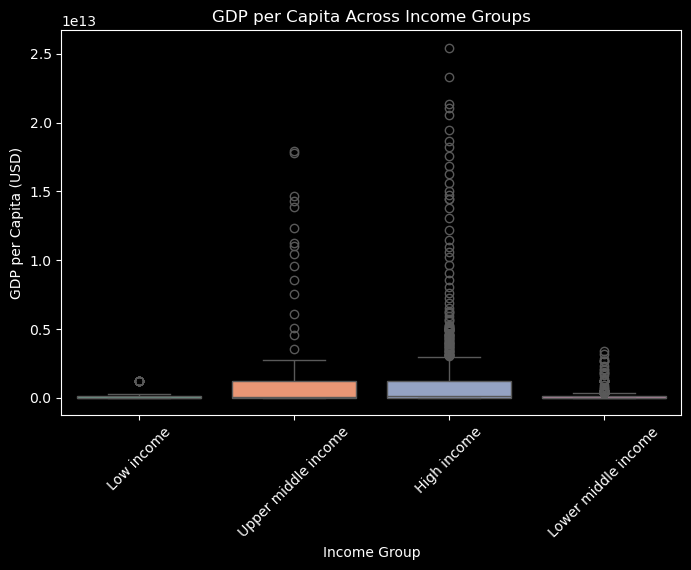

In [258]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Income group', y='GDP_current_US', data=df, palette='Set2')
plt.title('GDP per Capita Across Income Groups')
plt.xlabel('Income Group')
plt.ylabel('GDP per Capita (USD)')
plt.xticks(rotation=45)
plt.show()